## Importing libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs,make_circles,make_moons
from sklearn import metrics
from pylab import rcParams

## Clusters the pixels in an image

In [8]:
def quantize_image(img, n_clusters):
#     img - A 3D Numpy array
#     n_clusters - The number of clusters or colors in the final image
    
    # Converting the pixel data to 0-1
    img = img / 255
    
    # Reshape the data for clustering
    m,l,k = img.shape[0],img.shape[1],img.shape[2]
    df = pd.DataFrame(img.reshape(m*l, k))
    df.columns = ["R","G","B"]
    
    # Defining the model
    model = KMeans(n_clusters=n_clusters)
    
    # Fitting only a sample of the data for speed
    model.fit(df.sample(5000))
    
    # Clusters predicted on all the data
    df["clusters"] = model.predict(df)
    
    centers = pd.DataFrame(model.cluster_centers_)
    
    centers["clusters"] = range(n_clusters)
    
    df["ind"] = df.index # It is used to keep things from getting shuffled
    df = df.merge(centers) # Merge back with the pixel values of the centers
    df = df.sort_values("ind") # Reorder in the original order
    df = df.drop("ind",axis=1) # drop the index
    
    q_img = df.iloc[:,4:7].values
    
    # Reshape to original form
    q_img = q_img.reshape(img.shape[0],img.shape[1],img.shape[2])
    
    return q_img

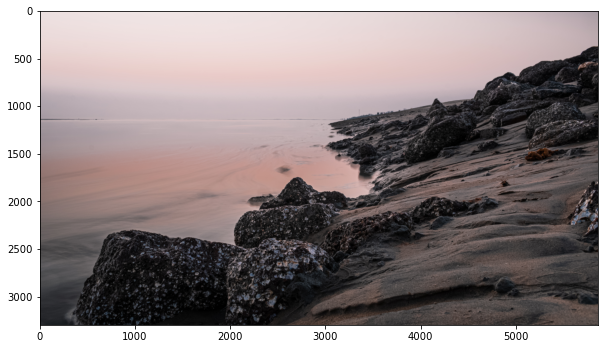

In [9]:
rcParams["figure.figsize"] = 10,10

# Loading the image
img = plt.imread("TEST1.jpg")

# Displaying the original image
plt.imshow(img)

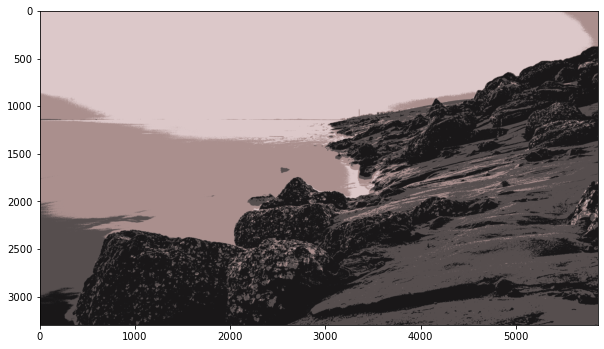

In [10]:
# Displaying the Quantized image
plt.imshow(quantize_image(img=img,n_clusters=4))